# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [1]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [3]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:wheelchair_speed-e706:Initialising MQTT connection for Thing 'dcd:things:wheelchair_speed-e706'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:wheelchair_speed-e706:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706 HTTP/1.1" 200 6724


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:wheelchair_speed-e706', 'name': 'Wheelchair_speed', 'description': '', 'type': 'Speed', 'properties': [{'type': 'THREE_DIMENSIONS', 'name': 'My Random Property', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}], 'id': 'my-random-property-5f3c', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572361628746, 'registeredAt': 1571392699000}, {'type': 'ONE_DIMENSION', 'name': 'one', 'description': '', 'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}], 'id': 'one-28d7', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572361628746, 'registeredAt': 1571994791000}, {

What does a Thing look like?

In [4]:
my_thing.to_json()

{'id': 'dcd:things:wheelchair_speed-e706',
 'name': 'Wheelchair_speed',
 'description': '',
 'type': 'Speed',
 'properties': [{'id': 'my-random-property-5f3c',
   'name': 'My Random Property',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''}]},
  {'id': 'one-28d7',
   'name': 'one',
   'description': '',
   'type': 'ONE_DIMENSION',
   'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}]},
  {'id': 'random-shit-aa03',
   'name': 'RANDOM SHIT',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Val

Which property do we want to explore and over which time frame?

In [5]:
from datetime import datetime, timedelta
# What dates?
now = datetime.now()
now_minus_10 = now + timedelta(minutes = -10)
START_DATE = datetime.strftime(now_minus_10, "%Y-%m-%d %H:%M:%S")
END_DATE = datetime.strftime(now, "%Y-%m-%d %H:%M:%S")

DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [6]:
PROPERTY_NAME = "one"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706/properties/one-28d7?from=1572361038000.0&to=1572361638000.0 HTTP/1.1" 200 17419


How many data point did we get?

In [7]:
print(len(my_property.values))

300


Display values

In [8]:
my_property.values

[[1572361038868, 0.449422],
 [1572361040870, 0.708227],
 [1572361042873, 0.600971],
 [1572361044876, 0.605841],
 [1572361046880, 0.177872],
 [1572361048885, 0.429413],
 [1572361050891, 0.254338],
 [1572361052894, 0.54525],
 [1572361054898, 0.247568],
 [1572361056901, 0.128198],
 [1572361058905, 0.11376],
 [1572361060907, 0.6281],
 [1572361062908, 0.505196],
 [1572361064910, 0.0328754],
 [1572361066913, 0.498223],
 [1572361068916, 0.935215],
 [1572361070922, 0.759552],
 [1572361072923, 0.436234],
 [1572361074927, 0.637195],
 [1572361076932, 0.868225],
 [1572361078934, 0.765366],
 [1572361080938, 0.861195],
 [1572361082939, 0.274259],
 [1572361084942, 0.808008],
 [1572361086946, 0.405959],
 [1572361088947, 0.367253],
 [1572361090953, 0.798251],
 [1572361092957, 0.866846],
 [1572361094959, 0.100617],
 [1572361096964, 0.312556],
 [1572361098970, 0.826026],
 [1572361100974, 0.484295],
 [1572361102976, 0.371362],
 [1572361104982, 0.18743],
 [1572361106983, 0.199079],
 [1572361108984, 0.66319

In [14]:
import pandas as pd
import os
data = my_property.values
df = pd.DataFrame(my_property.values, columns = ['time', 'velocity'])
df.to_csv('test.csv')

ct = datetime.now().strftime('%A %-d %B %Y')
print(ct)
nametag = 'Workout '+ct+'.csv'
os.rename('test.csv', nametag)

Tuesday 29 October 2019


INFO:dcd:things:wheelchair_speed-e706:Connection successful


# From CSV

In [50]:
from numpy import genfromtxt
import pandas as pd
data = genfromtxt('Workout Monday 28 October 2019.csv', delimiter=',')
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['time', 'velocity'])
data_frame

,time,velocity
NaT,NaN,NaN
1970-01-01 00:00:00.000,1.572269e+12,0.665310
1970-01-01 00:00:00.001,1.572269e+12,0.273751
1970-01-01 00:00:00.002,1.572269e+12,0.657456
1970-01-01 00:00:00.003,1.572269e+12,0.996647
...,...,...
1970-01-01 00:00:00.294,1.572270e+12,0.792367
1970-01-01 00:00:00.295,1.572270e+12,0.376382
1970-01-01 00:00:00.296,1.572270e+12,0.135379
1970-01-01 00:00:00.297,1.572270e+12,0.466731


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
data = np.array(my_property.values)

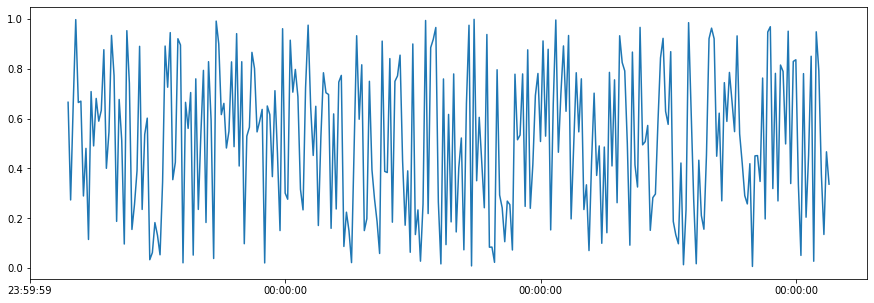

In [39]:
figure(num=None, figsize=(15, 5))
t = data_frame.index
#plt.plot(t, data_frame.x, t, data_frame.y)
plt.plot(t,data_frame.y)

In [41]:
#plt.hist(data[:,:])
#plt.show()

# Generate statistics with NumPy and Pandas

In [42]:
import numpy as np
from scipy.stats import kurtosis, skew

In [43]:
np.min(data[:,1:4], axis=0)

array([0.00714962])

In [44]:
skew(data[:,1:4])

array([-0.04736197])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [45]:
data[:10,1:]

array([[0.66531 ],
       [0.273751],
       [0.657456],
       [0.996647],
       [0.664451],
       [0.6698  ],
       [0.289665],
       [0.480498],
       [0.11529 ],
       [0.708229]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [46]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0
count,299.000000
mean,0.511929
std,0.291276
min,0.007150
25%,0.255531
50%,0.514969
75%,0.775477
max,0.997760


In [47]:
data_frame.rolling(10).std()

,0
2019-10-28 13:28:27.685,NaN
2019-10-28 13:28:29.688,NaN
2019-10-28 13:28:31.689,NaN
2019-10-28 13:28:33.695,NaN
2019-10-28 13:28:35.697,NaN
...,...
2019-10-28 13:38:16.639,0.354704
2019-10-28 13:38:18.640,0.339820
2019-10-28 13:38:20.642,0.354992
2019-10-28 13:38:22.646,0.324643


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

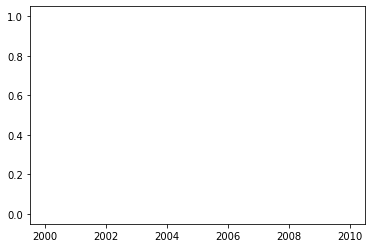

In [48]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

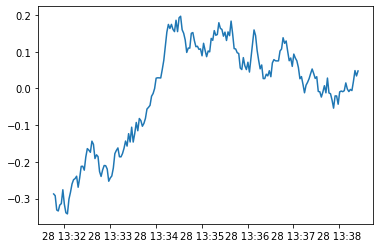

In [49]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

In [1]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

NameError: name 'plt' is not defined

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions